In [1]:
import numpy as np
from glob import glob
import itertools
import numpy as np
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)


import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.parse_config import read_config_file

from os.path import join
import os
import pandas as pd

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
params_f = "/data/Mito_Trace/parameters/pipeline/pipeline_v02.yaml"

prefix = "v02/CHIP_b1/MTBlacklist_A2"
cfg_outdir = "/data/Mito_Trace/output"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/comparisons"
all_files = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv,/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv" 

#names = ""
#cfg_f = "/data/Mito_Trace/parameters/pipeline/cosmo_server/jan21_2021.yaml"

exclude = [{"variants":"simple", 
           "method": "knn"}]

In [3]:
all_files = all_files.split(",")

In [4]:
all_files

['/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv',
 '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv',
 '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv',
 '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv',
 '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_Tru

In [5]:
params = read_config_file(params_f)
params

{'main': ['mtscATAC',
  'mtpreproc',
  'multiplex',
  'clones',
  'enrichment',
  'DE',
  'annotation_clones'],
 'cellranger_path': '/data2/resources/software/cellranger_6_1_1/cellranger-6.1.1/',
 'samtools_path': '/data2/resources/software/cellranger_6_1_1/cellranger-6.1.1/external/anaconda/bin',
 'annotation_granges': '/mnt/md0/isshamie/Projects/Mito_Trace/data/processed/annotation_granges/',
 'genome_path': {'MTBlacklist': {'genome_dir': 'data/external/GRCh38_MT_blacklist/',
   'ref_fa': 'data/external/GRCh38_1.2.0/refdata-cellranger-atac-GRCh38-1.2.0/fasta/genome.fa',
   'mt_ref_fa': 'data/external/GRCh38_1.2.0/refdata-cellranger-atac-GRCh38-1.2.0/chrM.fasta',
   'gene_file': 'data/external/GRCh38_1.2.0/refdata-cellranger-atac-GRCh38-1.2.0/genes/genes.gtf',
   'gff': 'hg38_1_2'},
  'MTblacklist_mtasnucl': {'genome_dir': 'data/external/GRCh38_MT_blacklist/',
   'ref_fa': 'data/external/GRCh38_1.2.0/refdata-cellranger-atac-GRCh38-1.2.0/fasta/genome.fa',
   'mt_ref_fa': 'data/external

In [6]:
# cfg = read_config_file(cfg_f)
# cfg

# params["prefix"] = cfg["prefix"]
# params["outdir"] = cfg["outdir"]

params["prefix"] = prefix
params["outdir"] = cfg_outdir

In [7]:
%load_ext autoreload
%autoreload 2
from src.files import create_single_files


In [8]:
params_files = create_single_files(params, "clones")
params_files = params_files.set_index('file')

#print(params_files.loc[0, 'file'])

params_files.iloc[0]

cols ['mincells', 'minreads', 'topN', 'hetthresh', 'minhetcells', 'hetcountthresh', 'bqthresh', 'cellrbc', 'numreadsfilter', 'basequality', 'lowcovthresh', 'ncellsthresh', 'method', 'variants', 'resolution', 'cdf_thresh', 'min_pct', 'btwnMinpct', 'logfc_threshold', 'p_thresh', 'assay', 'betweenClust_pval_thresh', 'betweenCond_pval_thresh', 'gsea_pval', 'prefilter', 'stat_col', 'padjmethod', 'min_cells', 'hyperMinCl', 'bothConds', 't', 'rt']
col_vals [(10,), (50,), (0,), (0.001,), (10,), (5,), (20,), (True,), (200,), (20,), (2,), (5,), ('knn',), ('mgatkdonor', 'init'), (30,), (0.3,), (0.01,), (0,), (0.1,), (0.1,), ('RNA',), (0.1,), (0.1,), (0.1,), ('FALSE',), ('log2FoldChange',), ('BH',), (1,), (10,), (False,), (0.1, 0.01), (10,)]
32
32
iter
cfg {'main': ['mtscATAC', 'mtpreproc', 'multiplex', 'clones', 'enrichment', 'DE', 'annotation_clones'], 'cellranger_path': '/data2/resources/software/cellranger_6_1_1/cellranger-6.1.1/', 'samtools_path': '/data2/resources/software/cellranger_6_1_1/c

mincells                                10
minreads                                50
topN                                     0
hetthresh                            0.001
minhetcells                             10
hetcountthresh                           5
bqthresh                                20
cellrbc                               True
numreadsfilter                         200
basequality                             20
lowcovthresh                             2
ncellsthresh                             5
method                                 knn
variants                        mgatkdonor
resolution                              30
cdf_thresh                             0.3
min_pct                               0.01
btwnMinpct                               0
logfc_threshold                        0.1
p_thresh                               0.1
assay                                  RNA
betweenClust_pval_thresh               0.1
betweenCond_pval_thresh                0.1
gsea_pval  

In [9]:
curr = params_files.copy()
print('len curr', curr.shape)

inds_to_drop = []
for ex_params in exclude:
    print(ex_params)
    for k in ex_params:
        print('k', k)
        print('ex_params', ex_params[k])
        curr = curr[curr[k] == ex_params[k]]
        print('len curr', curr.shape)
    inds_to_drop += (list(curr.index))
    
params_files = params_files.copy().loc[(~params_files.index.isin(inds_to_drop))]
print('len params_files', params_files.shape)

len curr (4, 32)
{'variants': 'simple', 'method': 'knn'}
k variants
ex_params simple
len curr (0, 32)
k method
ex_params knn
len curr (0, 32)
len params_files (4, 32)


In [10]:
params_files.reset_index()

file  mincells  minreads  \
0  /data/Mito_Trace/output/pipeline/v02/CHIP_b1/M...        10        50   
1  /data/Mito_Trace/output/pipeline/v02/CHIP_b1/M...        10        50   
2  /data/Mito_Trace/output/pipeline/v02/CHIP_b1/M...        10        50   
3  /data/Mito_Trace/output/pipeline/v02/CHIP_b1/M...        10        50   

   topN  hetthresh  minhetcells  hetcountthresh  bqthresh  cellrbc  \
0     0      0.001           10               5        20     True   
1     0      0.001           10               5        20     True   
2     0      0.001           10               5        20     True   
3     0      0.001           10               5        20     True   

   numreadsfilter  ...  betweenCond_pval_thresh  gsea_pval  prefilter  \
0             200  ...                      0.1        0.1      FALSE   
1             200  ...                      0.1        0.1      FALSE   
2             200  ...                      0.1        0.1      FALSE   
3             200  ...                      0.1        0.1      FALSE   

         stat_col padjmethod  min_cells  hyperMinCl  bothConds     t  rt  
0  log2FoldChange         BH          1          10      False  0.10  10  
1  log2FoldChange         BH          1          10      False  0.01  10  
2  log2FoldChange         BH          1          10      False  0.10  10  
3  log2FoldChange         BH          1          10      False  0.01  10  

[4 rows x 33 columns]

In [12]:
#names = names.split(" ")
#all_methods = []
all_methods_df = pd.read_csv(all_files[0], sep='\t').set_index("ID")

curr_out = (join(outdir, all_files[0]))#.replace("/", "_")
all_outs = [curr_out]
all_methods_df[curr_out] = all_methods_df["lineage"]
all_methods_df = all_methods_df[["condition", "donor", curr_out] ]

for ind, i in enumerate(all_files[1:]):
    print(i)
    curr_out = (join(outdir, i))#.replace("/", "_") #names[ind])
    curr_df = pd.read_csv(i, sep='\t').set_index("ID")
    curr_df[curr_out] = curr_df["lineage"]
    print('Number duplicated', curr_df.index.duplicated().sum())

    all_outs.append(curr_out)
    all_methods_df = pd.merge(all_methods_df, curr_df[~(curr_df.duplicated())][[curr_out]], 
                              left_index=True, right_index=True,how='outer')
    all_methods_df = all_methods_df[["condition", "donor"]+all_outs]
   # print('all_methods_df')
  #  print(all_methods_df.head())
    #all_methods.append(curr_df) #[curr_out] = curr_df

print('Number duplicated')
print(all_methods_df.duplicated().sum())
all_methods_df = all_methods_df[~(all_methods_df.duplicated())]
print(all_methods_df.duplicated().sum())


/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
Number duplicated 0
/data/Mito_Trace/outp

In [13]:
all_methods_df.head()

condition  donor  \
ID                                            
AAACGAAAGAATCAAC-1_Control   Control      0   
AAACGAAAGAATCAGT-1_Control   Control      1   
AAACGAAAGACGCCAA-1_Input       Input      0   
AAACGAAAGATATGAC-1_Input       Input      1   
AAACGAAAGCATACCT-1_Control   Control      1   
...                              ...    ...   
TAACGGTTCCGTTTCG-1_Input       Input      0   
TCAATTCCAGTAAGAT-1_Flt3l       Flt3l      0   
TCAATTCTCAACACGT-1_Control   Control      0   
TGGGTGCTCGTTCTAT-1_Input       Input      0   
TTTGAGGAGAATCAGT-1_Control   Control      0   

                            /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv  \
ID                                                                                                                                                                                                                                                               
AAACGAAAGAATCAAC-1_Control                                                 32                                                                                                                                                                                    
AAACGAAAGAATCAGT-1_Control                                                  2                                                                                                                                                                                    
AAACGAAAGACGCCAA-1_Input                                                    3                                                                                                                                                                                    
AAACGAAAGATATGAC-1_Input                                                   18                                                                                                                                                                                    
AAACGAAAGCATACCT-1_Control                                                 40                                                                                                                                                                                    
...                                                                       ...                                                                                                                                                                                    
TAACGGTTCCGTTTCG-1_Input                                                   41                                                                                                                                                                                    
TCAATTCCAGTAAGAT-1_Flt3l                                                   46                                                                                                                                                                                    
TCAATTCTCAACACGT-1_Control                                                 60                                                                                                                                                                                    
TGGGTGCTCGTTCTAT-1_Input                                                   53                                                                                                                                                                                    
TTTGAGGAGAATCAGT-1_Control                                                 43                                                                                                                                                                                    

                            /data/Mito_Trace/output/pipeline

## Create cell-pair vector
keys: 
- 0: Not same clone 
- 1: In same clone
- -1: Both are NA
- -2: One is NA


In [12]:
def calc_cell_pairs(cell_ser, clones_series):
    curr_id = cell_ser.name
    print('curr_id', curr_id)
    print('clones_series', clones_series.head())
    curr_clone = clones_series.loc[curr_id]
    print('curr_clone', curr_clone)
    if np.isnan(curr_clone):
        cell_ser.loc[:] == -1
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -2
    else:
        cell_ser.loc[:] = (curr_clone == clones_series.loc[cell_ser.index])
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -1
    return cell_ser



In [13]:
donor_all_methods_pairs_df = {}
for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    donor_all_methods_pairs_df[d] = {}
    # d = 0
    # curr_methods_df = all_methods_df.loc[all_methods_df["donor"]==d]
    #curr_donor_all_methods_pairs_df = {}

    for i in curr_methods_df.drop(["condition", "donor"], axis=1).columns:
        print('i', i)
        cell_pairs_df = pd.DataFrame(index=curr_methods_df.index, columns=curr_methods_df.index)
        donor_all_methods_pairs_df[d][i] = cell_pairs_df.apply(calc_cell_pairs, 
                                                            args=(curr_methods_df[i],), axis=1)



donor 0
i /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
curr_id AAACGAAAGAATCAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 32
curr_id AAACGAAAGACGCCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data

curr_id AAACTCGTCTTACGGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 3
curr_id AAACTGCAGACTTCCA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 5
curr_id AAACTGCAGCCCATGC-1_Control
clones_series I

curr_clone 0
curr_id AAAGGATAGAATACTG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 13
curr_id AAAGGATAGAGGTACC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 27
curr_id AAAGGATAGATAGGTT-1_Contro

curr_id AAAGGGCTCCTTACGC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 12
curr_id AAAGGGCTCGCTCTAC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 35
curr_id AAAGGGCTCGGTAGGA-1_Input
clones_series I

curr_id AACAAAGGTGCGACCT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 0
curr_id AACAAAGGTTAAGGGC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 3
curr_id AACAAAGTCAAGTTGC-1_Control
clones_series I

curr_id AACCGATGTTGGCTTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 19
curr_id AACCGATTCTGTTTAC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 20
curr_id AACCTGAAGTACCTCA-1_Control
clones_series

curr_id AACGGGAGTACATGGG-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 0
curr_id AACGGGAGTCAGCTTA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 34
curr_id AACGGGAGTTGGAGGT-1_Input
clones_series 

curr_clone 54
curr_id AAGGAGCCAACTGCGC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 14
curr_id AAGGAGCCAAGCAACG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 28
curr_id AAGGAGCCAAGCGGTA-1_Inp

curr_id ACAAAGAAGAATCAAC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 21
curr_id ACAAAGAAGACCCTAT-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 20
curr_id ACAAAGAAGTGGTGTG-1_Input
clones_series

curr_id ACTACGACACGCGCAT-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 32
curr_id ACTACGATCGACTGGC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 50
curr_id ACTCGGGAGGGCATTG-1_Flt3l
clones_series

curr_id CTTGCCACAAGCGAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 57
curr_id GAAACAAGTGGAAAGA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control    32
AAACGAAAGACGCCAA-1_Input       3
AAACGAAAGCGAGAAA-1_Control     3
AAACGAAAGTACAGAT-1_Control     2
AAACGAAAGTTAGCAA-1_Control    13
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 71
curr_id GAACGTTAGTGGGACT-1_Flt3l
clones_seri

curr_id AAACGAAAGACGCCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 33.0
curr_id AAACGAAAGCGAGAAA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 19.0
curr_id AAACGAAA

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACTCGGTCAGCTTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 15.0
curr_id AAACTCGGTGAGGGTT-1_Input
clones_series ID
AA

curr_id AAAGATGGTTATCGAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGTCAATTGGC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGTCA

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 17.0
curr_id AAAGGGCGTCCAGACC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 24.0
curr_id AAAGGGCGTGATAGAT-1_Input
clones_series ID

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 30.0
curr_id AACAAAGAGGCCTCGT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAAAGAGGGAGATA-1_Flt3l
clones_series ID
AA

curr_clone 32.0
curr_id AACCAACCAGCACATT-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCAACCATTGAACC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
cu

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGCACTGATAC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGCAGTAACTC-1_Input
clones_series ID
AAA

curr_id AACTTGGAGGGTCCCT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTTGGAGGTCGGTA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTTGGCAA

curr_clone nan
curr_id AATGGAAGTCAGGTGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 41.0
curr_id AATGGAATCAGTCAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
cu

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACCGAATTCCATTGAG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACCGCAGAGGCAAGGG-1_Control
clones_series ID

curr_clone nan
curr_id CAACGTATCTGACTTT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id CAGTATGAGACGTCAG-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      33.0
AAACGAAAGCGAGAAA-1_Control    19.0
AAACGAAAGTACAGAT-1_Control     2.0
AAACGAAAGTTAGCAA-1_Control    33.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_

i /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv
curr_id AAACGAAAGAATCAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 7.0
curr_id AAACGAAAGACGCCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/d

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 1.0
curr_id AAACTGCTCTCGCGGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 20.0
curr_id AAAGATGAGATGTTGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pip

curr_id AAAGATGTCAGAGTGG-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGTCATCATGG-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGTCCGGCGAT-1_Input
c

curr_id AAATGAGAGGATTAAC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 22.0
curr_id AAATGAGAGGTAAGTT-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGAGCATGCGTTA-1_Inpu

curr_id AAATGCCGTGGCCTCA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGCCGTTCTTATC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 16.0
curr_id AAATGCCTCACAGGGA-1_Inpu

curr_id AACCGATCACATTCTT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCGATCATGCGCTG-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 42.0
curr_id AACCGATGTGGTACTT-1_Flt3l


curr_id AACCTTTCAGCTGATT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCTTTCAGTAAGAT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCTTTCATCATAGC-1_Flt3l
c

curr_clone nan
curr_id AAGATAGAGTTGCTTG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 26.0
curr_id AAGATAGCATTGATGC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAGATA

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAGGTTCTCTATCTCA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATACGCAGAGTGGAA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/

curr_id ACGTTAGTCGAACCGC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACTAACGTCTCTTCTC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACTACCCGTCTAAGAA-1_Contr

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATCCAGACACATGATC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATGGATCTCACTTACT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipe

i /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv
curr_id AAACGAAAGAATCAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 0.0
curr_id AAACGAAAGACGCCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2

curr_id AAAGATGGTAAACGTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGGTAACATAG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGGTAGATGAT-1_Inp

curr_id AAATGAGTCCGAATTG-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGAGTCCTTCGAC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGAGTCTCAGATG-1_Contr

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 29.0
curr_id AACCTGAGTGAGGTCA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCTGAGTGGCCTCA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/p

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAGGAGCCACACACAT-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAGGAGCGTGGCGCTT-1_Control
clones_series ID
AAACGAAAGAA

curr_id ATATTCCAGACTTCCA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATCCAGACACATGATC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATGGATCTCACTTACT-1_Flt

curr_id AAACTCGAGATGTTCC-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 29.0
curr_id AAACTCGAGTCTCCAA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 36.0
curr_id AAACTCGAGT

curr_id AAAGGATAGTTCTCCC-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGATCAACTCCCT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGATCAAGT

curr_id AACAAAGCAGGTGTGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAAAGCATCCCTCA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAAAGGTCAA

curr_id AACCGATCAATTCAGC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 39.0
curr_id AACCGATCACATTCTT-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCGATCA

curr_id AAGATAGAGTGTAATG-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAGATAGAGTTGCTTG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 26.0
curr_id AAGATAGCA

curr_id ACCTGCTTCTCTATTG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACGGATTAGCCGCAAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     7.0
AAACGAAAGACGCCAA-1_Input      13.0
AAACGAAAGCGAGAAA-1_Control    15.0
AAACGAAAGTACAGAT-1_Control     9.0
AAACGAAAGTTAGCAA-1_Control    36.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACGTTAGAGT

i /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
curr_id AAACGAAAGAATCAAC-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 0.0
curr_id AAACGAAAGACGCCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/

curr_id AAAGATGCAAAGAGAG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGCACCGTTGG-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGC

curr_id AAATGCCGTCTGGGAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGCCGTGATAAGT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 23.0
curr_id AAATGCCGT

curr_id AACGAGGAGCGTATCT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGCAAACGACG-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 31.0
curr_id AACGAGG

clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATACGCTCCCTACCA-1_Control
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 18.0
curr_id AATGGAAAGAAGGGCG-1_Control
clones_series

curr_id ATGGATCTCACTTACT-1_Flt3l
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATGTCTTAGACCGCAA-1_Input
clones_series ID
AAACGAAAGAATCAAC-1_Control     0.0
AAACGAAAGACGCCAA-1_Input      10.0
AAACGAAAGCGAGAAA-1_Control    27.0
AAACGAAAGTACAGAT-1_Control     5.0
AAACGAAAGTTAGCAA-1_Control     2.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATTACTCCAA

clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 1
curr_id AAACGAAAGTGTCGGA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 1
curr_id AAACGAACAAGACTAA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     

curr_id AAAGGATTCAAATGGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 11
curr_id AAAGGATTCACACGTA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 6
curr_id AAAGGATTCCTTTGAT-1_Flt3l
clones_series ID

clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 18
curr_id AACAGTCGTAAACGTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 38
curr_id AACAGTCGTCTGCGCA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     

curr_id AACTGTGAGTTGTCCA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 38
curr_id AACTGTGCACAGATGG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 9
curr_id AACTGTGCAGATAAGT-1_Input
clones_series 

clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 30
curr_id CAACCAACATCCGTGG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     2
AAACGAAAGATATGAC-1_Input      18
AAACGAAAGCATACCT-1_Control    40
AAACGAAAGGAGACTC-1_Flt3l      30
AAACGAAAGTAATGTG-1_Input       4
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv, dtype: int64
curr_clone 30
curr_id CACAACACAACAAACA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     

curr_id AAACTGCCAAGGAACC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 4.0
curr_id AAACTGCCACGCTGTG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 6.0
curr_id AAACTGCGTAGC

curr_id AAATGAGGTGAATGTA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 28.0
curr_id AAATGAGGTTCCAATG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 40.0
curr_id AAATGAGT

curr_clone nan
curr_id AACGAGGCAGGGAGTT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGCAGGTAGCA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 31.0


curr_id AACGTACTCACAAGCT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTGGTAGCGTTAGG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTGGTAGT

curr_id ACAGACTTCGTTACAG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACAGACTTCTCTATTG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACAGCGCAGATC

curr_clone nan
curr_id ATCCCTGAGAGATTAC-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id CAAAGCTCAGCCGAAA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     1.0
AAACGAAAGATATGAC-1_Input      18.0
AAACGAAAGCATACCT-1_Control    21.0
AAACGAAAGGAGACTC-1_Flt3l      26.0
AAACGAAAGTAATGTG-1_Input       5.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
c

curr_clone 0.0
curr_id AAACGAAGTCTTAGCA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 20.0
curr_id AAACGAAGTGGTTCTA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACGAAG

curr_id AAACTCGTCCGAGAGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 14.0
curr_id AAACTCGTCTGCGTCT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 1.0
curr_id AAACTCGTCTTTGCAT-1_Flt3

clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 26.0
curr_id AAAGGATTCTATCTTG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 23.0
curr_id AAAGGGCAGATCGATA-1_Input
clones_series ID
AAACGAAAGAATCAG

curr_clone nan
curr_id AAATGAGCAGACTAAA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 20.0
curr_id AAATGAGCAGGGCTTC-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGAGCAT

curr_id AACAGTCCACGCTCAG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAGTCCAGAGAGAA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAGTCCAGGTTATC-1_Contr

curr_id AACCAACAGTCTCCAA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCAACAGTTCAACC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACCAACCAATGCCAT-1_Flt3l

curr_id AACTGTGTCCCGGGTA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTGTGTCGCGCCAA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTTGGAGAAGGGCG-1_Con

curr_id AATGGAATCGACTTAG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATGGCTAGTCGTGAG-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATGGCTCAAGCGAAC-1_Input

curr_id CCATACCTCGGTACTA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 32.0
curr_id CCTAAAGAGCACACCC-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id CGGACCAGTCGGCTGT-1_Fl

curr_clone 2.0
curr_id AAACTCGTCTTTGCAT-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACTGCAGCGAGCTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACTGCAG

curr_id AAAGATGAGTCGTGAG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGAGTGATTAG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGCAAGCGAAC-1_Contr

curr_id AAAGGATTCGCGATGC-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGATTCTAAACGC-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 28.0
curr_id AAAGGATTCTATCTTG-1_In

curr_id AAATGAGTCCACGCTT-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAATGAGTCGCGATGC-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 15.0
curr_id AAATGAGTCGTTACAG-1_Inpu

clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACATCGTCTGGGCGT-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 11.0
curr_id AACATCGTCTTATCAC-1_Input
clones_series ID
AAACGAAAGAATCA

curr_id AACGGGAAGGTTGTTC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGGGAAGTCTGCTA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGGGACAAGCAATA-1_Contr

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATGGAAGTCTGCACG-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATGGAATCAAAGTAG-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/outpu

curr_id ACCATCCTCTCCTTAA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACCCAAAGTAACTGAA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACCGCAGAGACAACGC-1_Input

curr_id AAACGAAAGAATCAGT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 4.0
curr_id AAACGAAAGATATGAC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 17.0
curr_id AAACGAAAG

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 7.0
curr_id AAACTCGGTAAGTCTC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 6.0
curr_id AAACTCGGTAGGTCTT-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Tra

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGATCAAAGGTCG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 5.0
curr_id AAAGGATCAAATTCCG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Tra

Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGGCCATGCTATG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGGCCATTCTTTG-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Tra

curr_id AACAAAGCACTACACA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACAAAGCACTGTCGG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 19.0
curr_id AACAAAGCAGG

clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACATCGTCCAGTACA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone 36.0
curr_id AACATCGTCGTGAGTT-1_Flt3l
clones_series ID
AA

curr_id AACTGGTCACCCTTTG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTGGTCAGCGCGTT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTGGTGTA

curr_clone nan
curr_id AATGCCAAGAGCCTGA-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AATGCCACATCATGTG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_

clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATAGTCGTCAAGTTGC-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     4.0
AAACGAAAGATATGAC-1_Input      17.0
AAACGAAAGCATACCT-1_Control    30.0
AAACGAAAGGAGACTC-1_Flt3l      25.0
AAACGAAAGTAATGTG-1_Input      12.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ATATTCCCACGCGCAT-1_Flt3l
clones_series ID
A

i /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
curr_id AAACGAAAGAATCAGT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 5.0
curr_id AAACGAAAGATATGAC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/

curr_id AAACTCGGTAAGTCTC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACTCGGTAGGTCTT-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAACTCGGTC

curr_id AAAGATGTCAGCCGAC-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 14.0
curr_id AAAGATGTCCATCTAT-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGATGTC

curr_id AAAGGATTCTATCTTG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 22.0
curr_id AAAGGGCAGATCGATA-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AAAGGGCAG

clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 20.0
curr_id AAATGCCTCCAGGTCG-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone 25.0
curr_id AAATGCCTCCATCTAT-1_Flt3l
clones_series 

curr_id AACATCGCAAATGCTC-1_Flt3l
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACATCGGTACGCAAG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACATCGGTA

clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGCAGGTAGCA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACGAGGGTATGTTCG-1_Control
clones_series 

curr_id AACTTGGAGAAGGGCG-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTTGGAGTGTAATG-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id AACTTGGC

curr_clone nan
curr_id ACAATCGTCCGGGCAT-1_Input
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id ACAATCGTCTGGGCGT-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
c

curr_clone nan
curr_id CCATACCTCGGTACTA-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan
curr_id CCTAAAGAGCACACCC-1_Control
clones_series ID
AAACGAAAGAATCAGT-1_Control     5.0
AAACGAAAGATATGAC-1_Input      23.0
AAACGAAAGCATACCT-1_Control     0.0
AAACGAAAGGAGACTC-1_Flt3l       9.0
AAACGAAAGTAATGTG-1_Input       3.0
Name: /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv, dtype: float64
curr_clone nan

In [14]:
def calc_meth_overlap(meth_a, meth_b, use_na=False):
    n_T_T = ((meth_a == True) & (meth_b==True)).values.sum()
    n_F_F = ((meth_a == False) & (meth_b==False)).values.sum()
    n_F_T = ((meth_a == False) & (meth_b==True)).values.sum()
    n_T_F = ((meth_a == True) & (meth_b==False)).values.sum()
    
    n_nas_mone = ((meth_a == -1) & (meth_b==-1)).values.sum()
    n_nas_mtwo = ((meth_a == -2) & (meth_b==-2)).values.sum()
    
    n_nas_both = ((meth_a < 0) & (meth_b<0)).values.sum()
    n_nas_mis = (((meth_a < 0) & (meth_b >= 0)) | ((meth_a >= 0) & (meth_b < 0))).values.sum()
    
    
    n_together = n_T_T + n_F_F + n_F_T + n_T_F
    
    #out_meth = meth_a == meth_b
    
    if not use_na:
        meth_a = meth_a.drop(meth_a<0)
        meth_b = meth_b.drop(meth_b<0)    
        
        inds = set(meth_a.index).intersection(set(meth_b.index))
        meth_a = meth_a.loc[inds]
        meth_b = meth_b.loc[inds]
    #jaccard(meth_a, meth_b)
    n_T_T_norm = n_T_T/(n_T_T+n_T_F+n_F_T) #n_together
    n_T_F_norm = n_T_F/n_together
    n_F_T_norm = n_F_T/n_together
    n_F_F_norm = n_F_F/n_together
    return {"n_T_T":n_T_T, "n_F_F":n_F_F,
            "n_F_T":n_F_T, "n_T_F":n_T_F, 
            
            "n_T_T_norm":n_T_T_norm, "n_F_F_norm":n_F_F_norm,
            "n_F_T_norm":n_F_T_norm, "n_T_F_norm":n_T_F_norm, 
            
            "n_nas_mone":n_nas_mone, "n_nas_mtwo":n_nas_mtwo, 
            "n_nas_both":n_nas_both, "n_nas_mis":n_nas_mis,
            "n_together":n_together, 
            "n_agree": n_T_T  +n_F_F
           }

In [15]:
def get_title(fname, params_files):
    print('fname', fname)
#     pre_ind = fname.find('/')
#     print('pre_ind')
#     print(pre_ind)
#     prefix = fname[:pre_ind]
#     print('prefix', prefix)
#     curr_file = fname[pre_ind:].replace("/concat", "").replace("/cells_meta.tsv", "")
    curr_file = fname.replace("/concat", "").replace("/cells_meta.tsv", "")
    #print('curr_file', curr_file)
    params = params_files.loc[curr_file].iloc[0]
    #print('params', params[["method", "nclonelist", "resolution"]])
    if params['method'] == 'knn':
        meth_params = params['resolution']
    if params['method'] == 'vireo':        
        meth_params = params['nclonelist']
    return f"Variants method: {params['variants']}\n clones method: {params['method']}\nClones params: {meth_params}"


In [16]:
meth_df = pd.DataFrame(columns=["donor", "m1", "m2", "n_agree", "n_T_T", "n_F_F", "n_F_T", "n_T_F", 
                                "n_T_T_norm", "n_F_F_norm", 
                                "n_F_T_norm", "n_T_F_norm", "n_nas_mone", "n_nas_mtwo", 
                                "n_nas_both", "n_nas_mis", "n_together"])

for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    curr_d_methods = list(donor_all_methods_pairs_df[d].keys())
    curr_d_pairs = list(itertools.product(curr_d_methods, repeat=2))
    for curr_pair in curr_d_pairs:
        if curr_pair[0] == curr_pair[1]:
            continue
        print("curr_pair")
        print(curr_pair[0])
        print(curr_pair[1])
        a = donor_all_methods_pairs_df[d][curr_pair[0]]
        b = donor_all_methods_pairs_df[d][curr_pair[1]]
        curr_out = calc_meth_overlap(a,b)
        curr_out["donor"] = d
        curr_out["m1"] = get_title(curr_pair[0], params_files) #curr_pair[0]
        curr_out["m2"] = get_title(curr_pair[1], params_files) #curr_pair[1]
        meth_df = meth_df.append(pd.DataFrame(curr_out, index= [f"d{d}_m1{curr_pair[0]}_m2{curr_pair[1]}"]))
        #meth_df.loc[curr_pair]
meth_df["n_agree_norm"] = meth_df["n_agree"]/meth_df["n_together"]

donor 0
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBla

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/me

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/d

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
donor 1
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlack

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_75/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_3/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cell

fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/cells_meta.tsv
curr_pair
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_75/cells_meta.tsv
/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_75/cells_meta.tsv
fname /data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged

## Average over donors

In [17]:
# meth_df = pd.DataFrame(columns=["donor", "m1", "m2", "n_agree", "n_T_T", "n_F_F", "n_F_T", "n_T_F", 
#                                 "n_T_T_norm", "n_F_F_norm", 
#                                 "n_F_T_norm", "n_T_F_norm", "n_nas_mone", "n_nas_mtwo", 
#                                 "n_nas_both", "n_nas_mis", "n_together"])

# for d, curr_methods_df in all_methods_df.groupby("donor"):
#     print('donor', d)
#     curr_d_methods = list(donor_all_methods_pairs_df[d].keys())
#     curr_d_pairs = list(itertools.product(curr_d_methods, repeat=2))
#     for curr_pair in curr_d_pairs:
#         if curr_pair[0] == curr_pair[1]:
#             continue
#         print("curr_pair")
#         print(curr_pair[0])
#         print(curr_pair[1])
#         a = donor_all_methods_pairs_df[d][curr_pair[0]]
#         b = donor_all_methods_pairs_df[d][curr_pair[1]]
#         curr_out = calc_meth_overlap(a,b)
#         curr_out["donor"] = d
#         curr_out["m1"] = get_title(curr_pair[0], params_files) #curr_pair[0]
#         curr_out["m2"] = get_title(curr_pair[1], params_files) #curr_pair[1]
#         meth_df = meth_df.append(pd.DataFrame(curr_out, index= [f"d{d}_m1{curr_pair[0]}_m2{curr_pair[1]}"]))
#         #meth_df.loc[curr_pair]
# meth_df["n_agree_norm"] = meth_df["n_agree"]/meth_df["n_together"]

## Correlation Heatmaps for different metrics

In [18]:
sns.set(font_scale=1.2)
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')

    metric = args[0] #kwargs.pop(args[0])
    print('metric', metric)
    d = data.pivot(index="m1", columns="m2", values=[args[0]])
    #d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)
    return

def donors_heatmap(df, metric, title=""): 
    df[metric] = df[metric].astype('float')
    g = sns.FacetGrid(df, col="donor", col_wrap=2, height=12, aspect=1)
    g.map_dataframe(draw_heatmap, metric, cbar=True, square=True)
    g.figure.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
    plt.tight_layout()
    return

def donors_agg_heatmap(df, metric, title="", to_log=False):
    df = df.copy()
    if to_log:
        df[metric] = np.log10(df[metric]+1)
    df_agg = df.groupby(['m1','m2']).mean().reset_index()
    f = plt.figure(figsize=(12,12), dpi=300)
    draw_heatmap(metric, data=df_agg)
    plt.title(title)#"Methods comparison: #pairs in shared clusters clusters")
    plt.tight_layout()
    return

In [19]:
df_agg = meth_df.groupby(['m1','m2']).mean()
df_agg.reset_index()

m1  \
0   Variants method: init\n clones method: knn\nCl...   
1   Variants method: init\n clones method: knn\nCl...   
2   Variants method: init\n clones method: knn\nCl...   
3   Variants method: init\n clones method: knn\nCl...   
4   Variants method: init\n clones method: knn\nCl...   
5   Variants method: init\n clones method: knn\nCl...   
6   Variants method: init\n clones method: knn\nCl...   
7   Variants method: init\n clones method: knn\nCl...   
8   Variants method: init\n clones method: knn\nCl...   
9   Variants method: init\n clones method: knn\nCl...   
10  Variants method: mgatkdonor\n clones method: k...   
11  Variants method: mgatkdonor\n clones method: k...   
12  Variants method: mgatkdonor\n clones method: k...   
13  Variants method: mgatkdonor\n clones method: k...   
14  Variants method: mgatkdonor\n clones method: k...   
15  Variants method: mgatkdonor\n clones method: k...   
16  Variants method: mgatkdonor\n clones method: k...   
17  Variants method: mgatkdonor\n clones method: k...   
18  Variants method: mgatkdonor\n clones method: k...   
19  Variants method: mgatkdonor\n clones method: k...   
20  Variants method: simpleUnion\n clones method: ...   
21  Variants method: simpleUnion\n clones method: ...   
22  Variants method: simpleUnion\n clones method: ...   
23  Variants method: simpleUnion\n clones method: ...   
24  Variants method: simpleUnion\n clones method: ...   
25  Variants method: simpleUnion\n clones method: ...   
26  Variants method: simpleUnion\n clones method: ...   
27  Variants method: simpleUnion\n clones method: ...   
28  Variants method: simpleUnion\n clones method: ...   
29  Variants method: simpleUnion\n clones method: ...   

                                                   m2  n_T_T_norm  n_F_F_norm  \
0   Variants method: init\n clones method: knn\nCl...    0.724215    0.956867   
1   Variants method: mgatkdonor\n clones method: k...    0.379577    0.962980   
2   Variants method: mgatkdonor\n clones method: k...    0.666438    0.963197   
3   Variants method: simpleUnion\n clones method: ...    1.000000    0.976784   
4   Variants method: simpleUnion\n clones method: ...    0.724215    0.956867   
5   Variants method: init\n clones method: knn\nCl...    0.724215    0.956867   
6   Variants method: mgatkdonor\n clones method: k...    0.424606    0.954993   
7   Variants method: mgatkdonor\n clones method: k...    0.675224    0.960960   
8   Variants method: simpleUnion\n clones method: ...    0.724215    0.956867   
9   Variants method: simpleUnion\n clones method: ...    1.000000    0.969108   
10  Variants method: init\n clones method: knn\nCl...    0.379577    0.962980   
11  Variants method: init\n clones method: knn\nCl...    0.424606    0.954993   
12  Variants method: mgatkdonor\n clones method: k...    0.494844    0.968057   
13  Variants method: simpleUnion\n clones method: ...    0.379577    0.962980   
14  Variants method: simpleUnion\n clones method: ...    0.424606    0.954993   
15  Variants method: init\n clones method: knn\nCl...    0.666438    0.963197   
16  Variants method: init\n clones method: knn\nCl...    0.675224    0.960960   
17  Variants method: mgatkdonor\n clones method: k...    0.494844    0.968057   
18  Variants method: simpleUnion\n clones method: ...    0.666438    0.963197   
19  Variants method: simpleUnion\n clones method: ...    0.675224    0.960960   
20  Variants method: init\n clones method: knn\nCl...    1.000000    0.976784   
21  Variants method: init\n clones method: knn\nCl...    0.724215    0.956867   
22  Variants method: mgatkdonor\n clones method: k...    0.379577    0.962980   
23  Variants method: mgatkdonor\n clones method: k...    0.666438    0.963197   
24  Variants method: simpleUnion\n clones method: ...    0.724215    0.956867   
25  Variants method: init\n clones method: knn\nCl...    0.724215    0.956867   
26  Variants method: init\n clones method: knn\nCl...    1.000000    0.969108   
27  Variants me

metric n_agree
metric n_agree


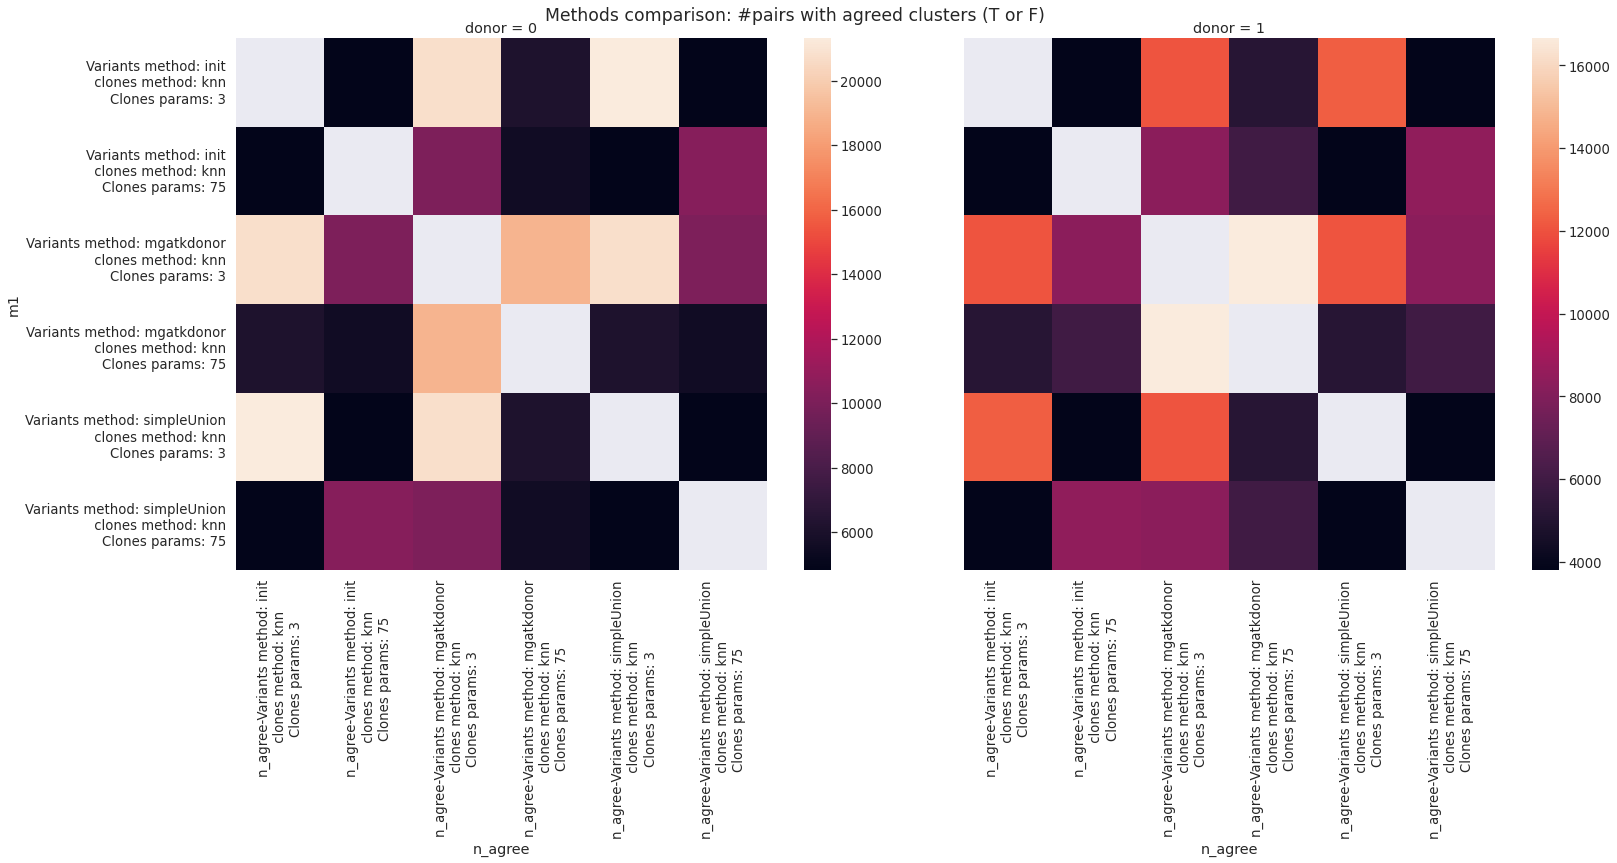

In [20]:
donors_heatmap(meth_df, metric="n_agree", 
               title="Methods comparison: #pairs with agreed clusters (T or F)")
plt.savefig(join(outdir, "methods_nAgree.png"))

metric n_T_T
metric n_T_T


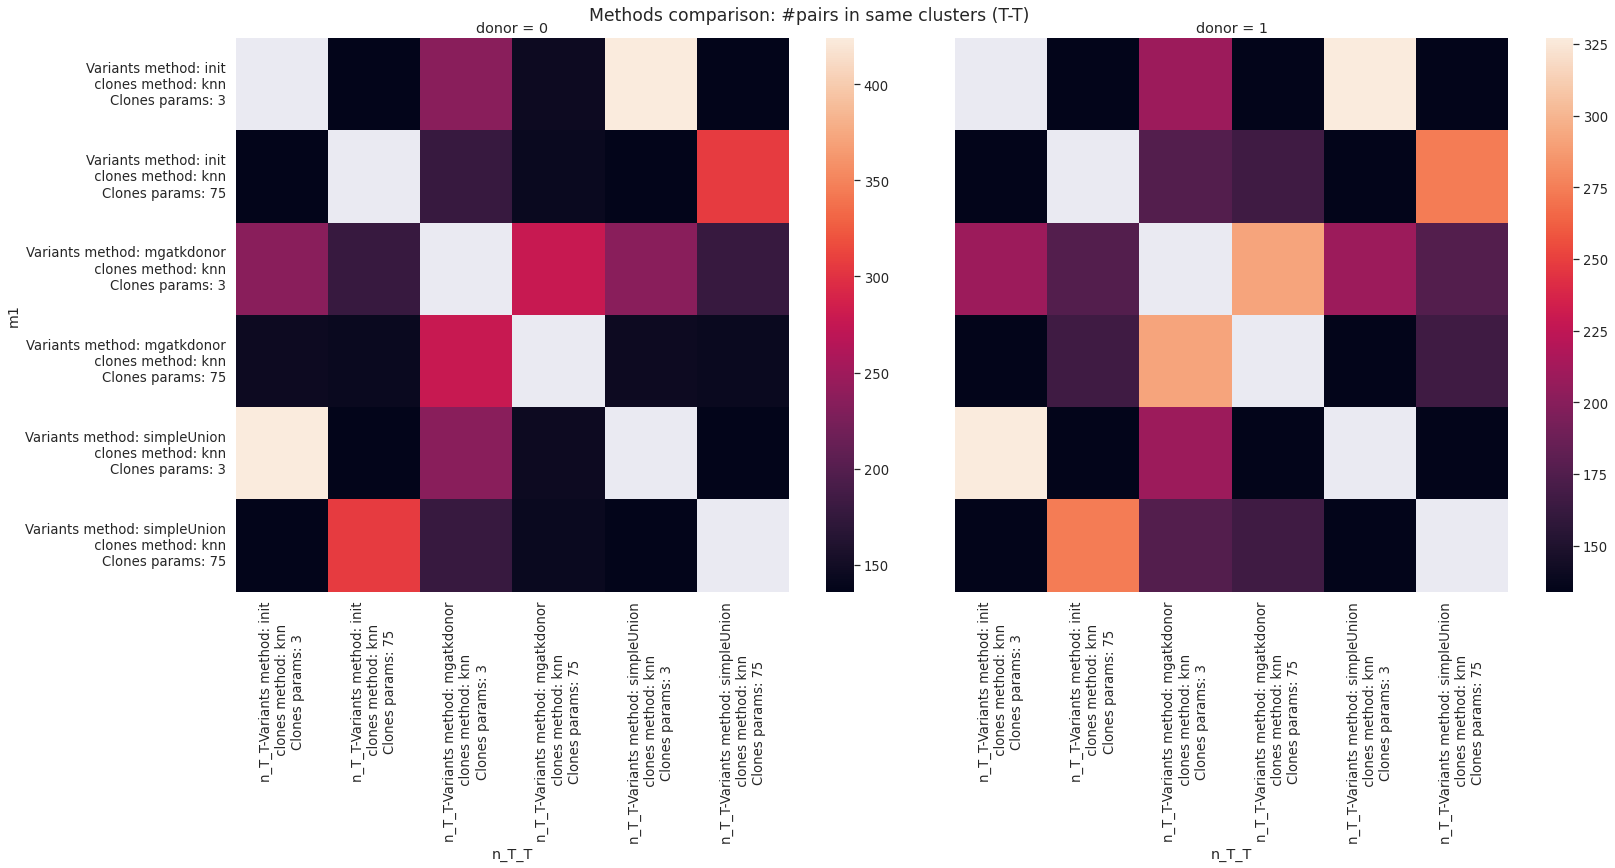

In [21]:
donors_heatmap(meth_df, metric="n_T_T", 
               title="Methods comparison: #pairs in same clusters (T-T)")
plt.savefig(join(outdir, "methods_nTT.png"))
# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_T_T"]).astype('float'))
#     plt.title(f"Methods comparison: #pairs in shared clusters clusters\n donor {d}")

metric n_agree_norm
metric n_agree_norm


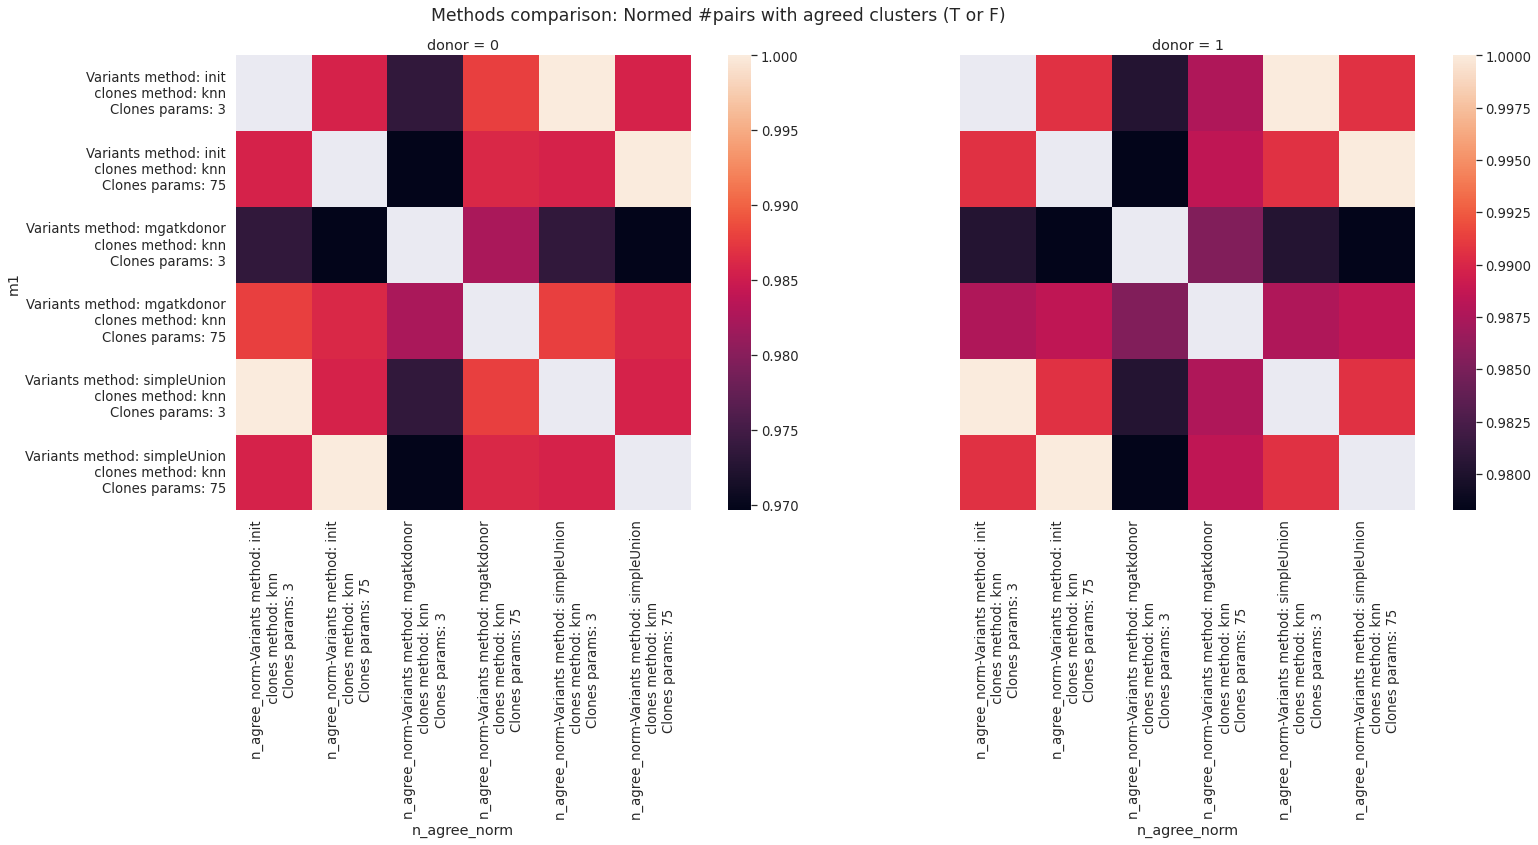

In [22]:
donors_heatmap(meth_df, metric="n_agree_norm", 
               title="Methods comparison: Normed #pairs with agreed clusters (T or F)")
plt.savefig(join(outdir, "methods_nAgreeNorm.png"))

# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_agree_norm"]).astype('float'))
#     plt.title(f"Methods comparison: Normed #pairs with agreed clusters (T or F)\n donor {d}")

metric n_T_T_norm
metric n_T_T_norm


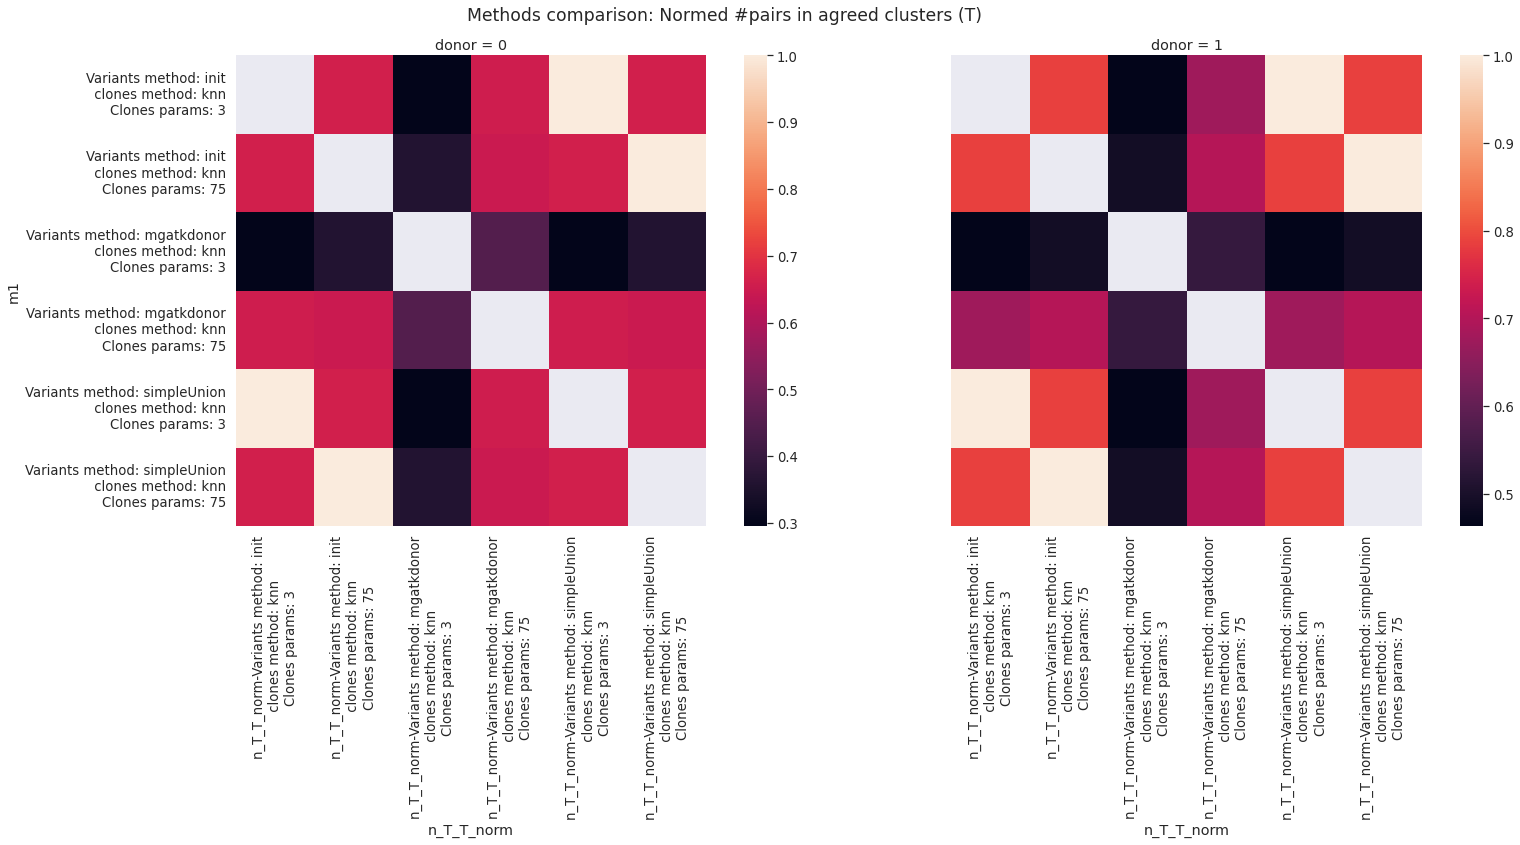

In [23]:
donors_heatmap(meth_df, metric="n_T_T_norm", title="Methods comparison: Normed #pairs in agreed clusters (T)")
plt.savefig(join(outdir, "methods_nTTNorm.png"))


In [24]:
meth_df.to_csv(join(outdir, "methods_comparisons.csv"))

params_files.to_csv(join(outdir, "params_files.csv"))

## Donors aggregate

metric n_agree
metric n_agree_norm
metric n_T_T
metric n_T_T_norm


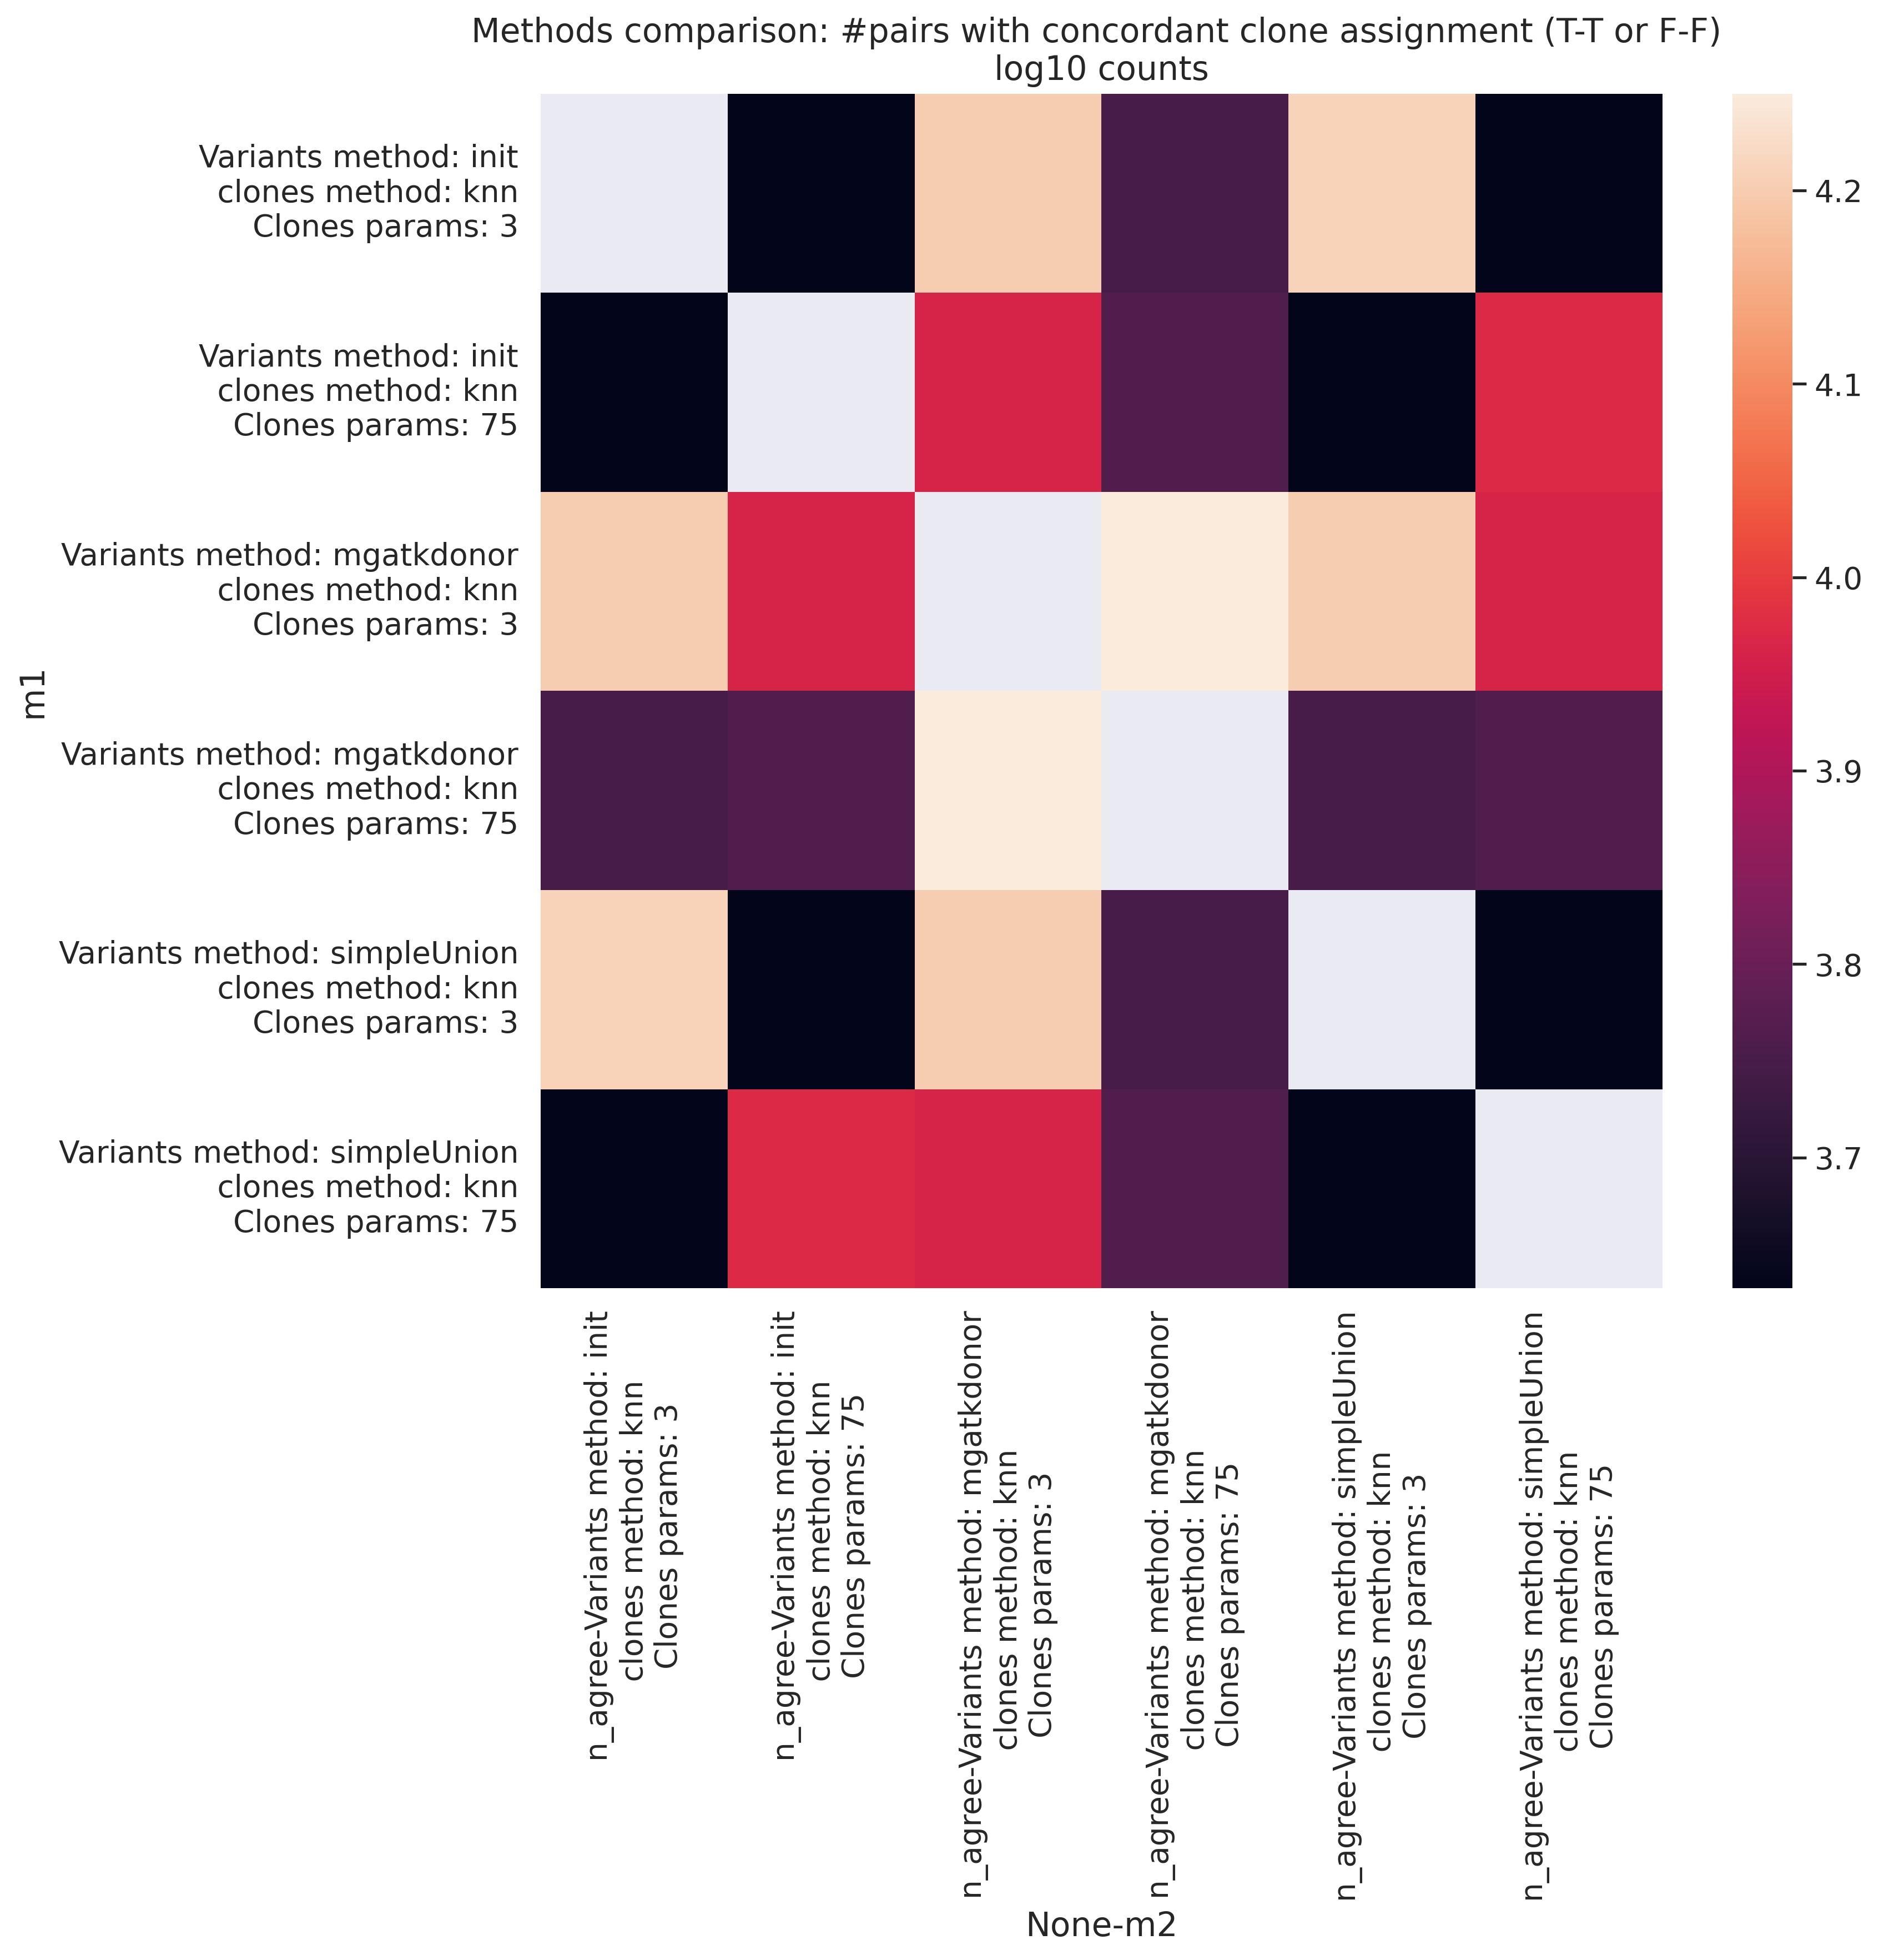

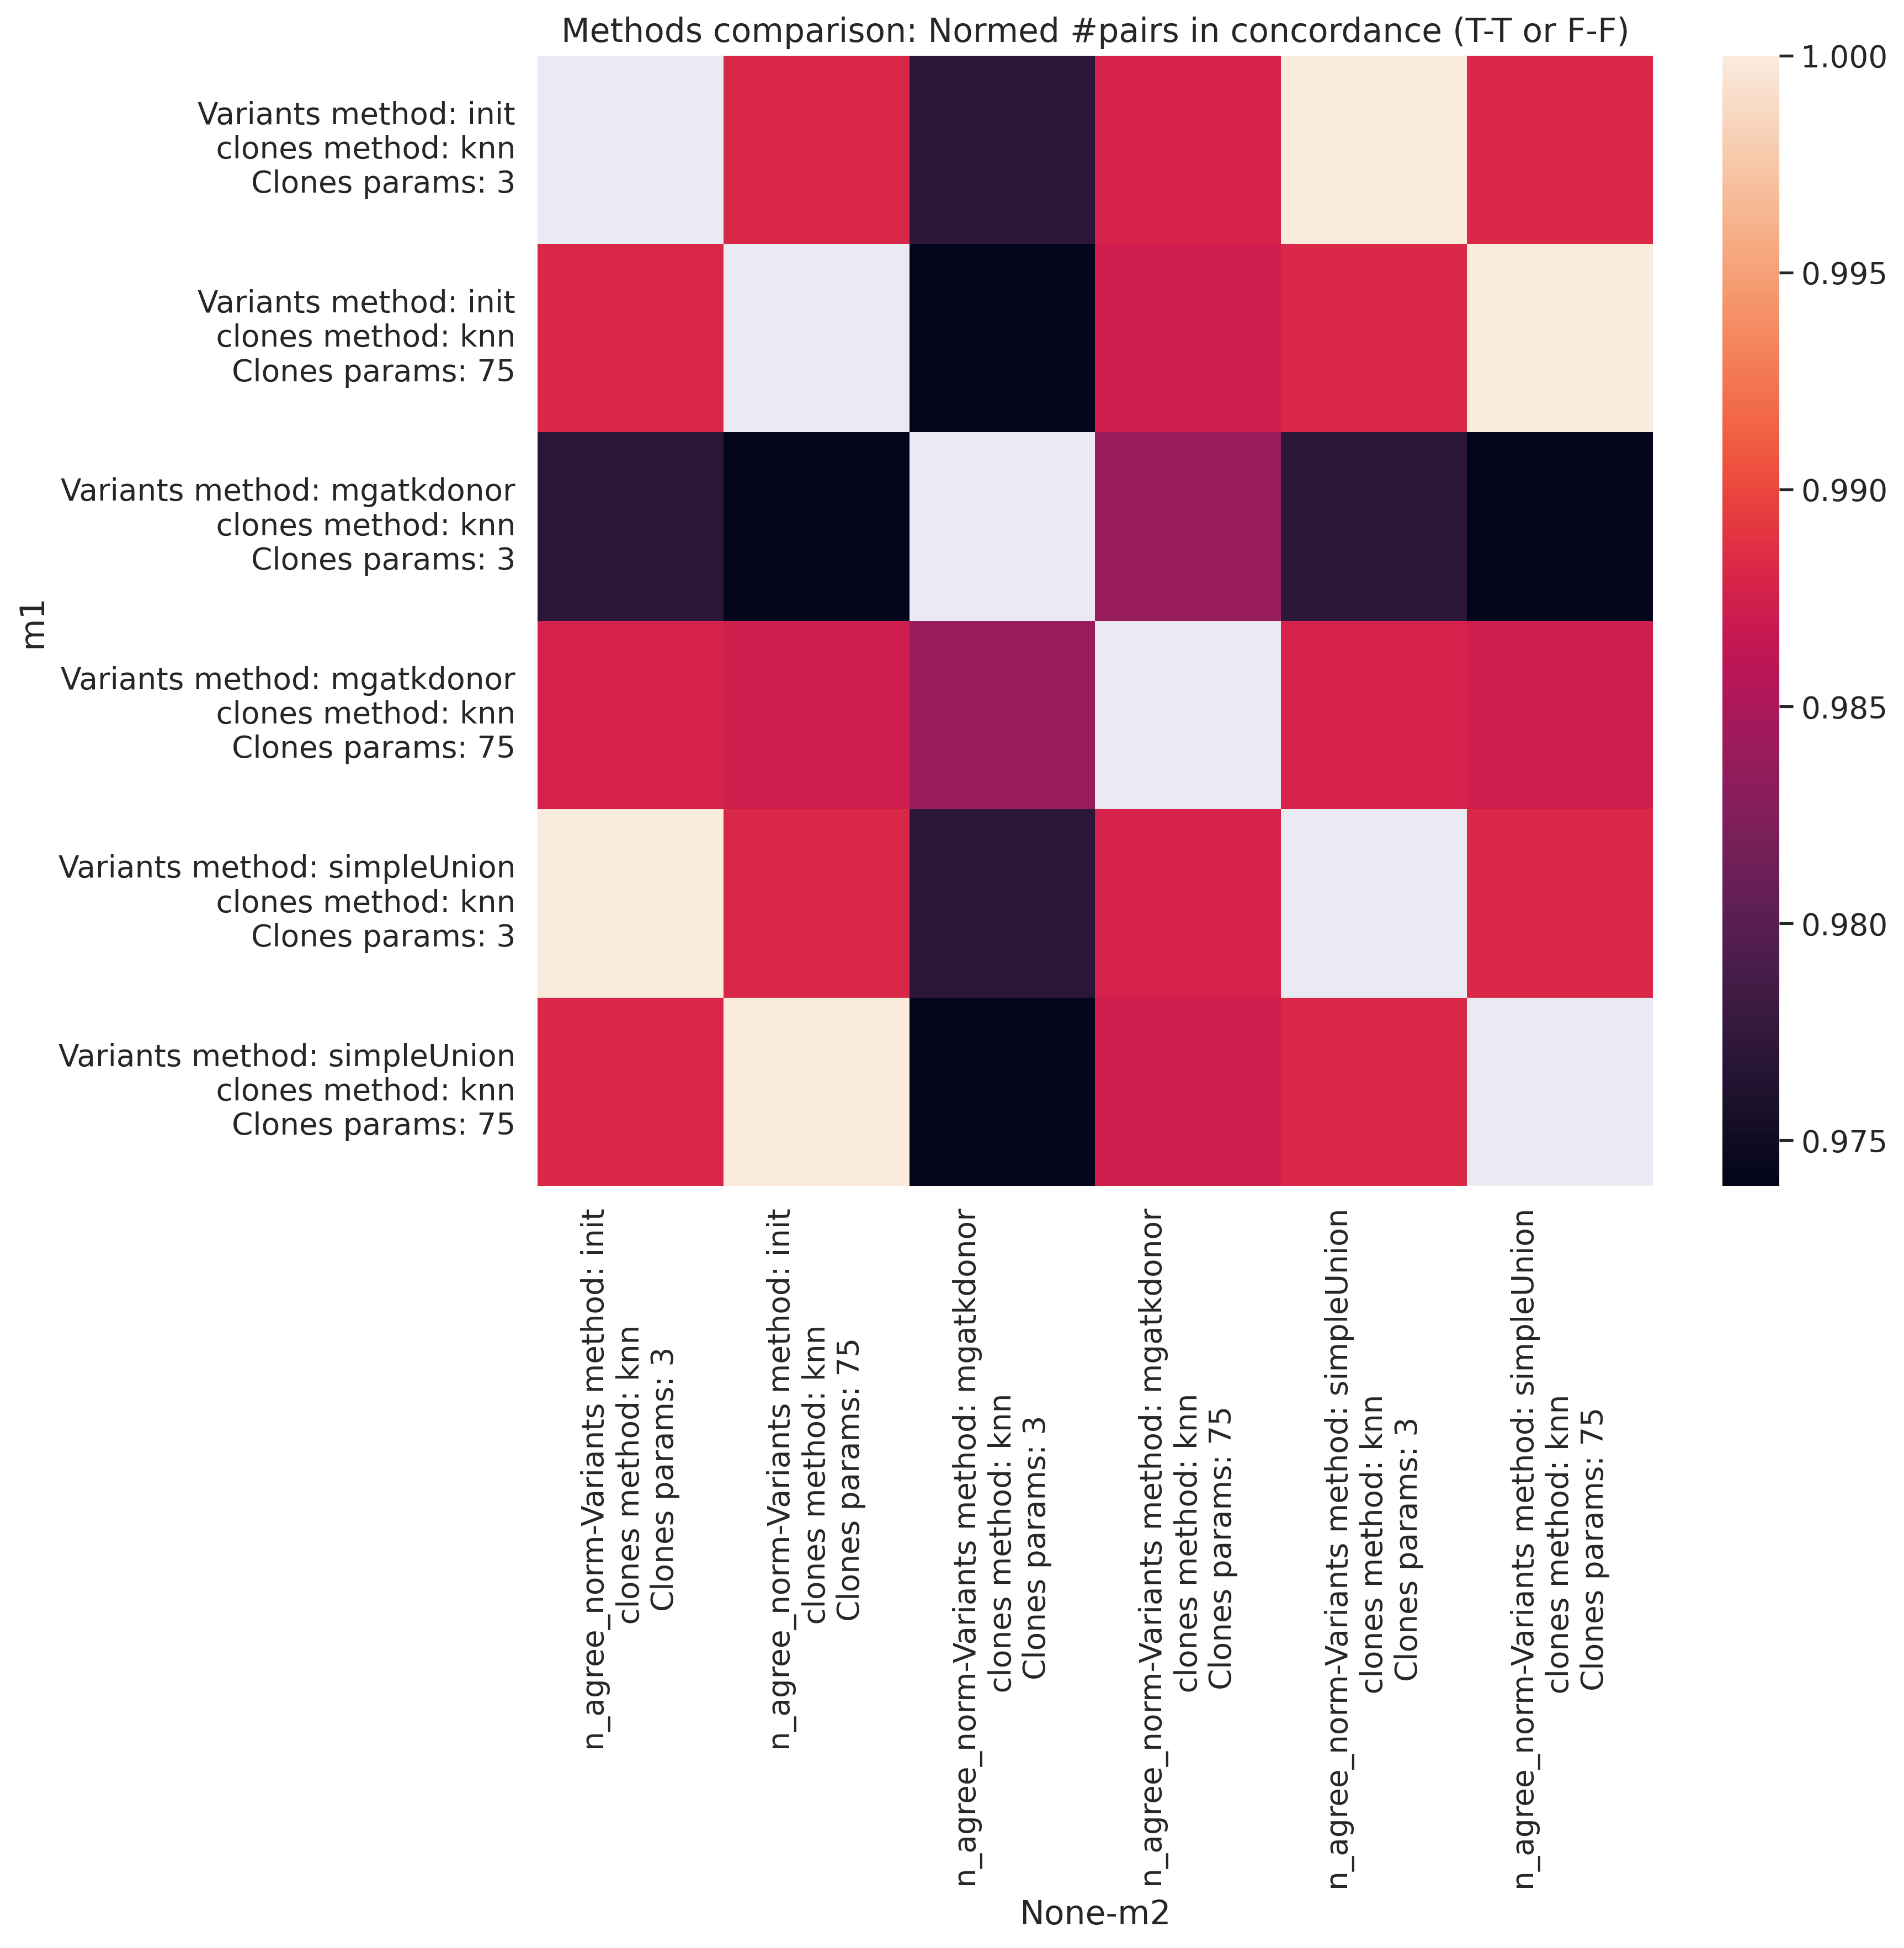

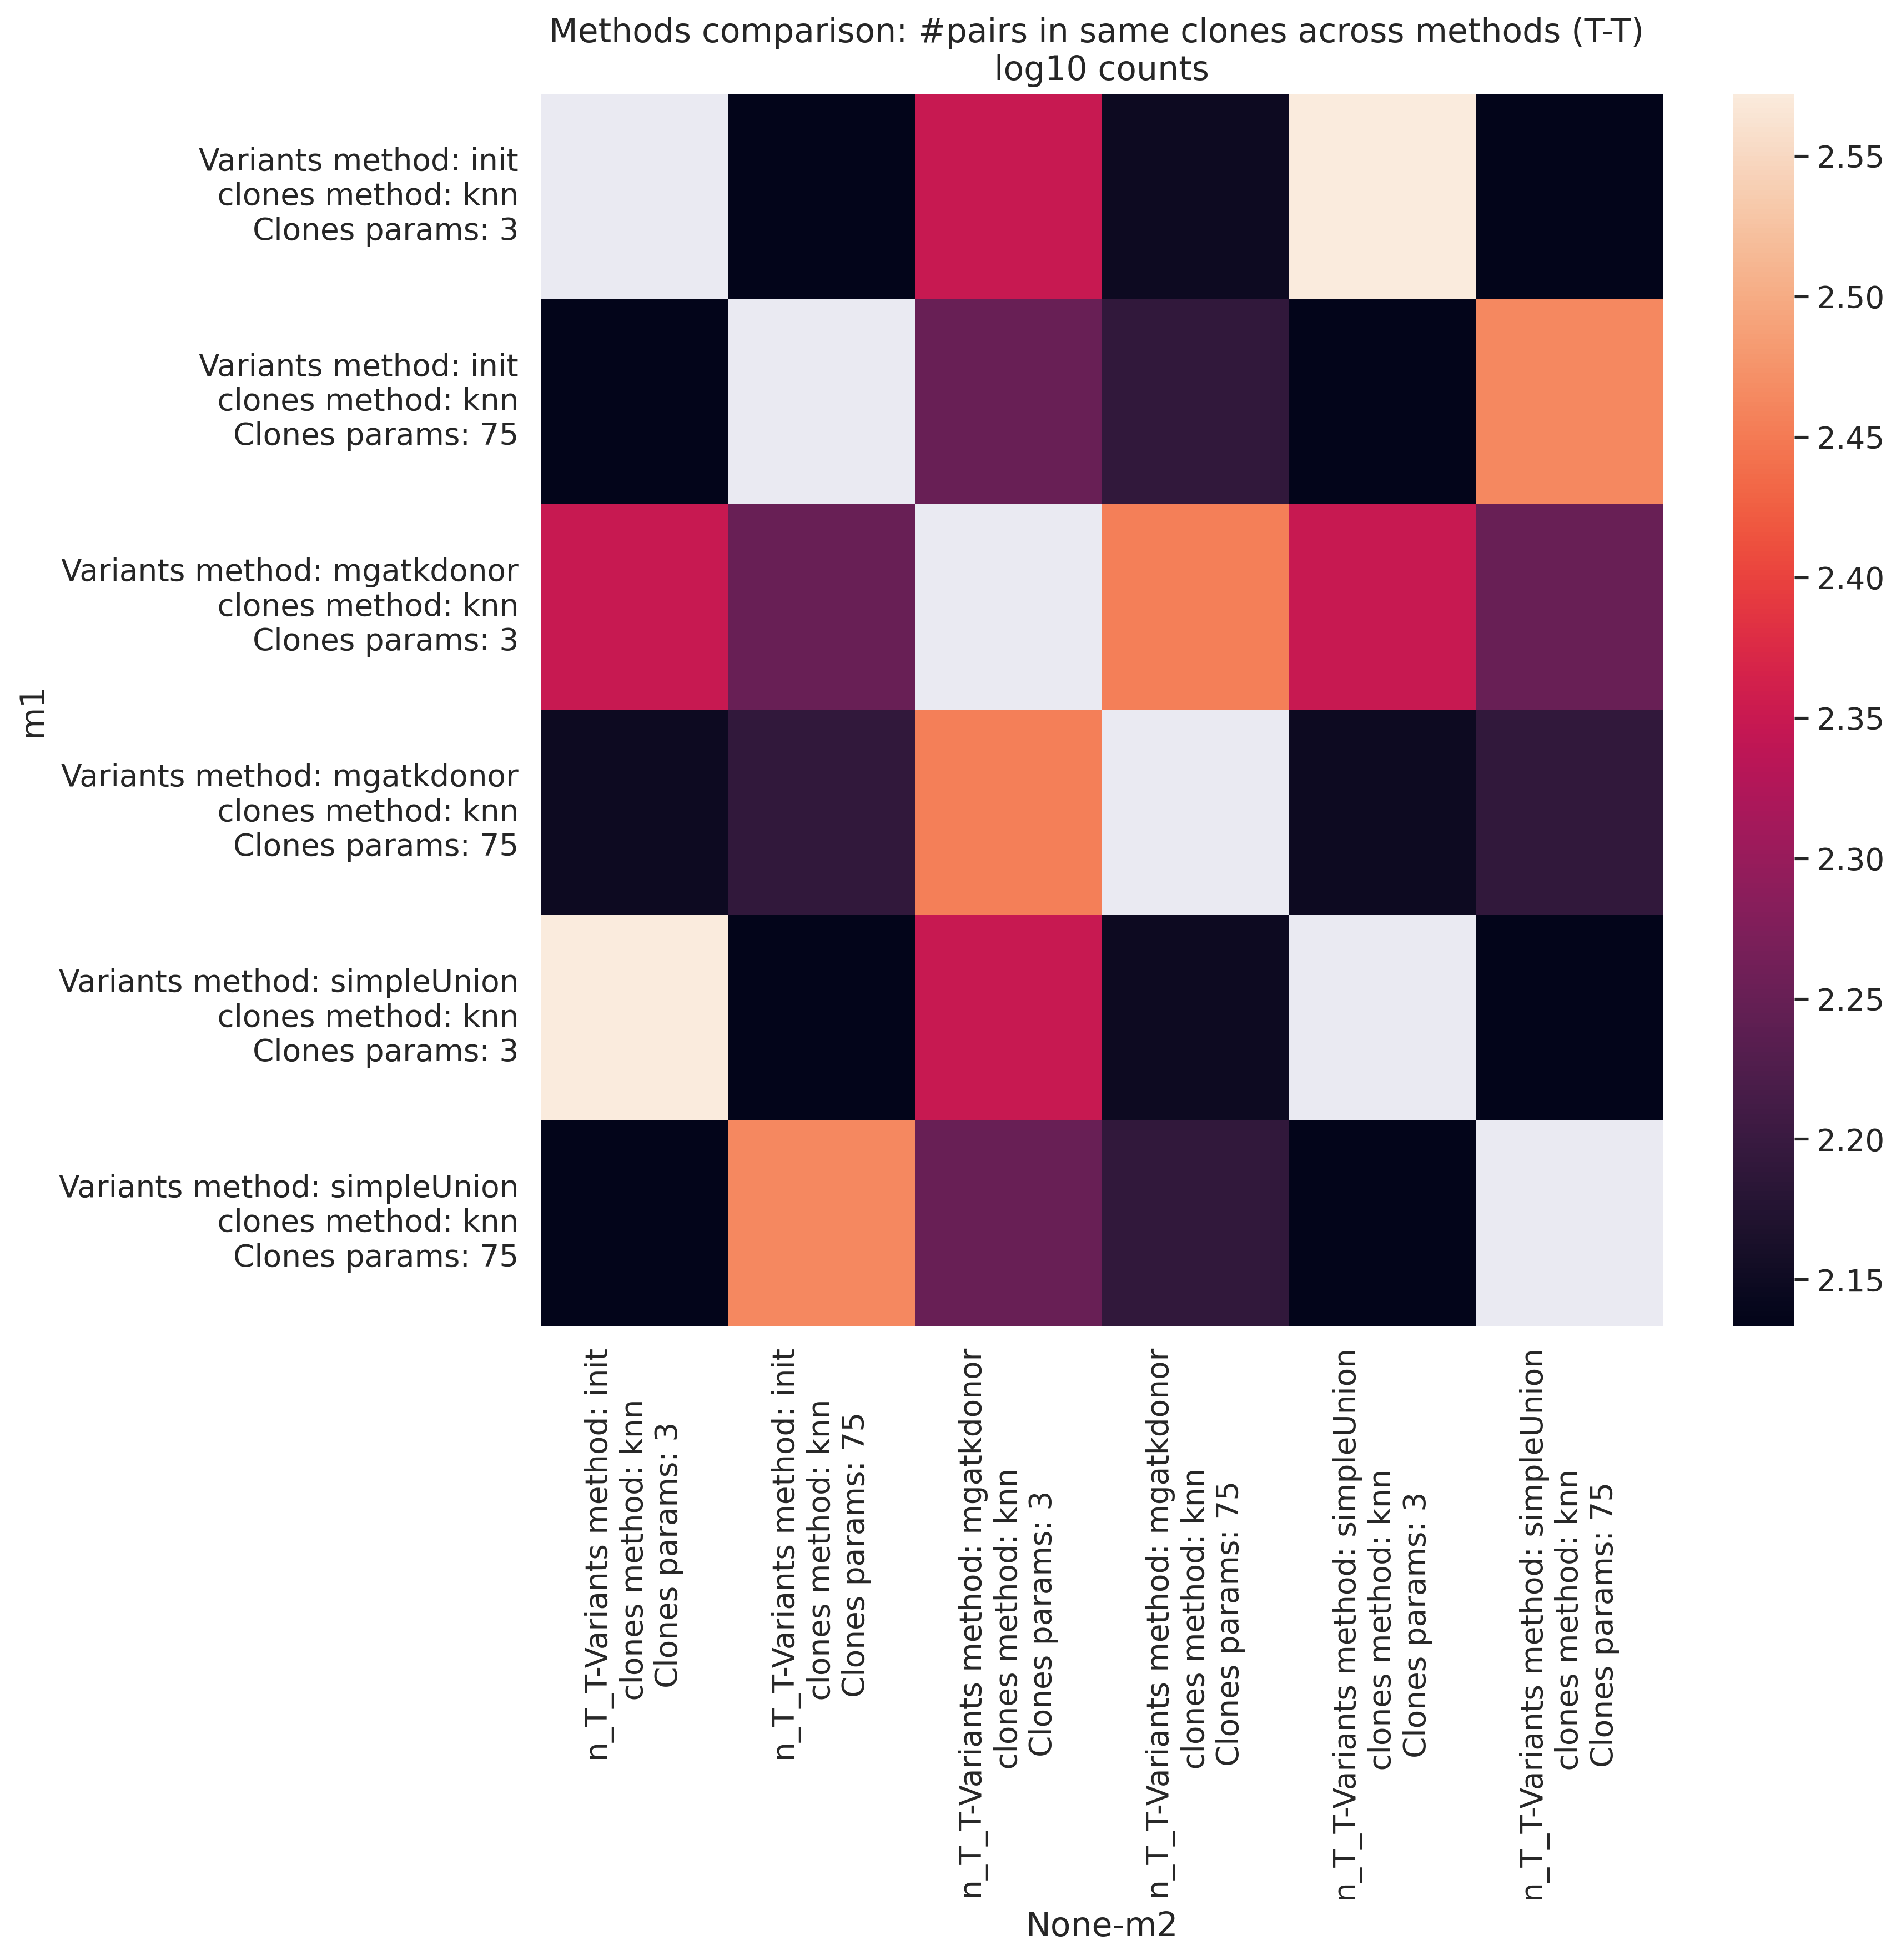

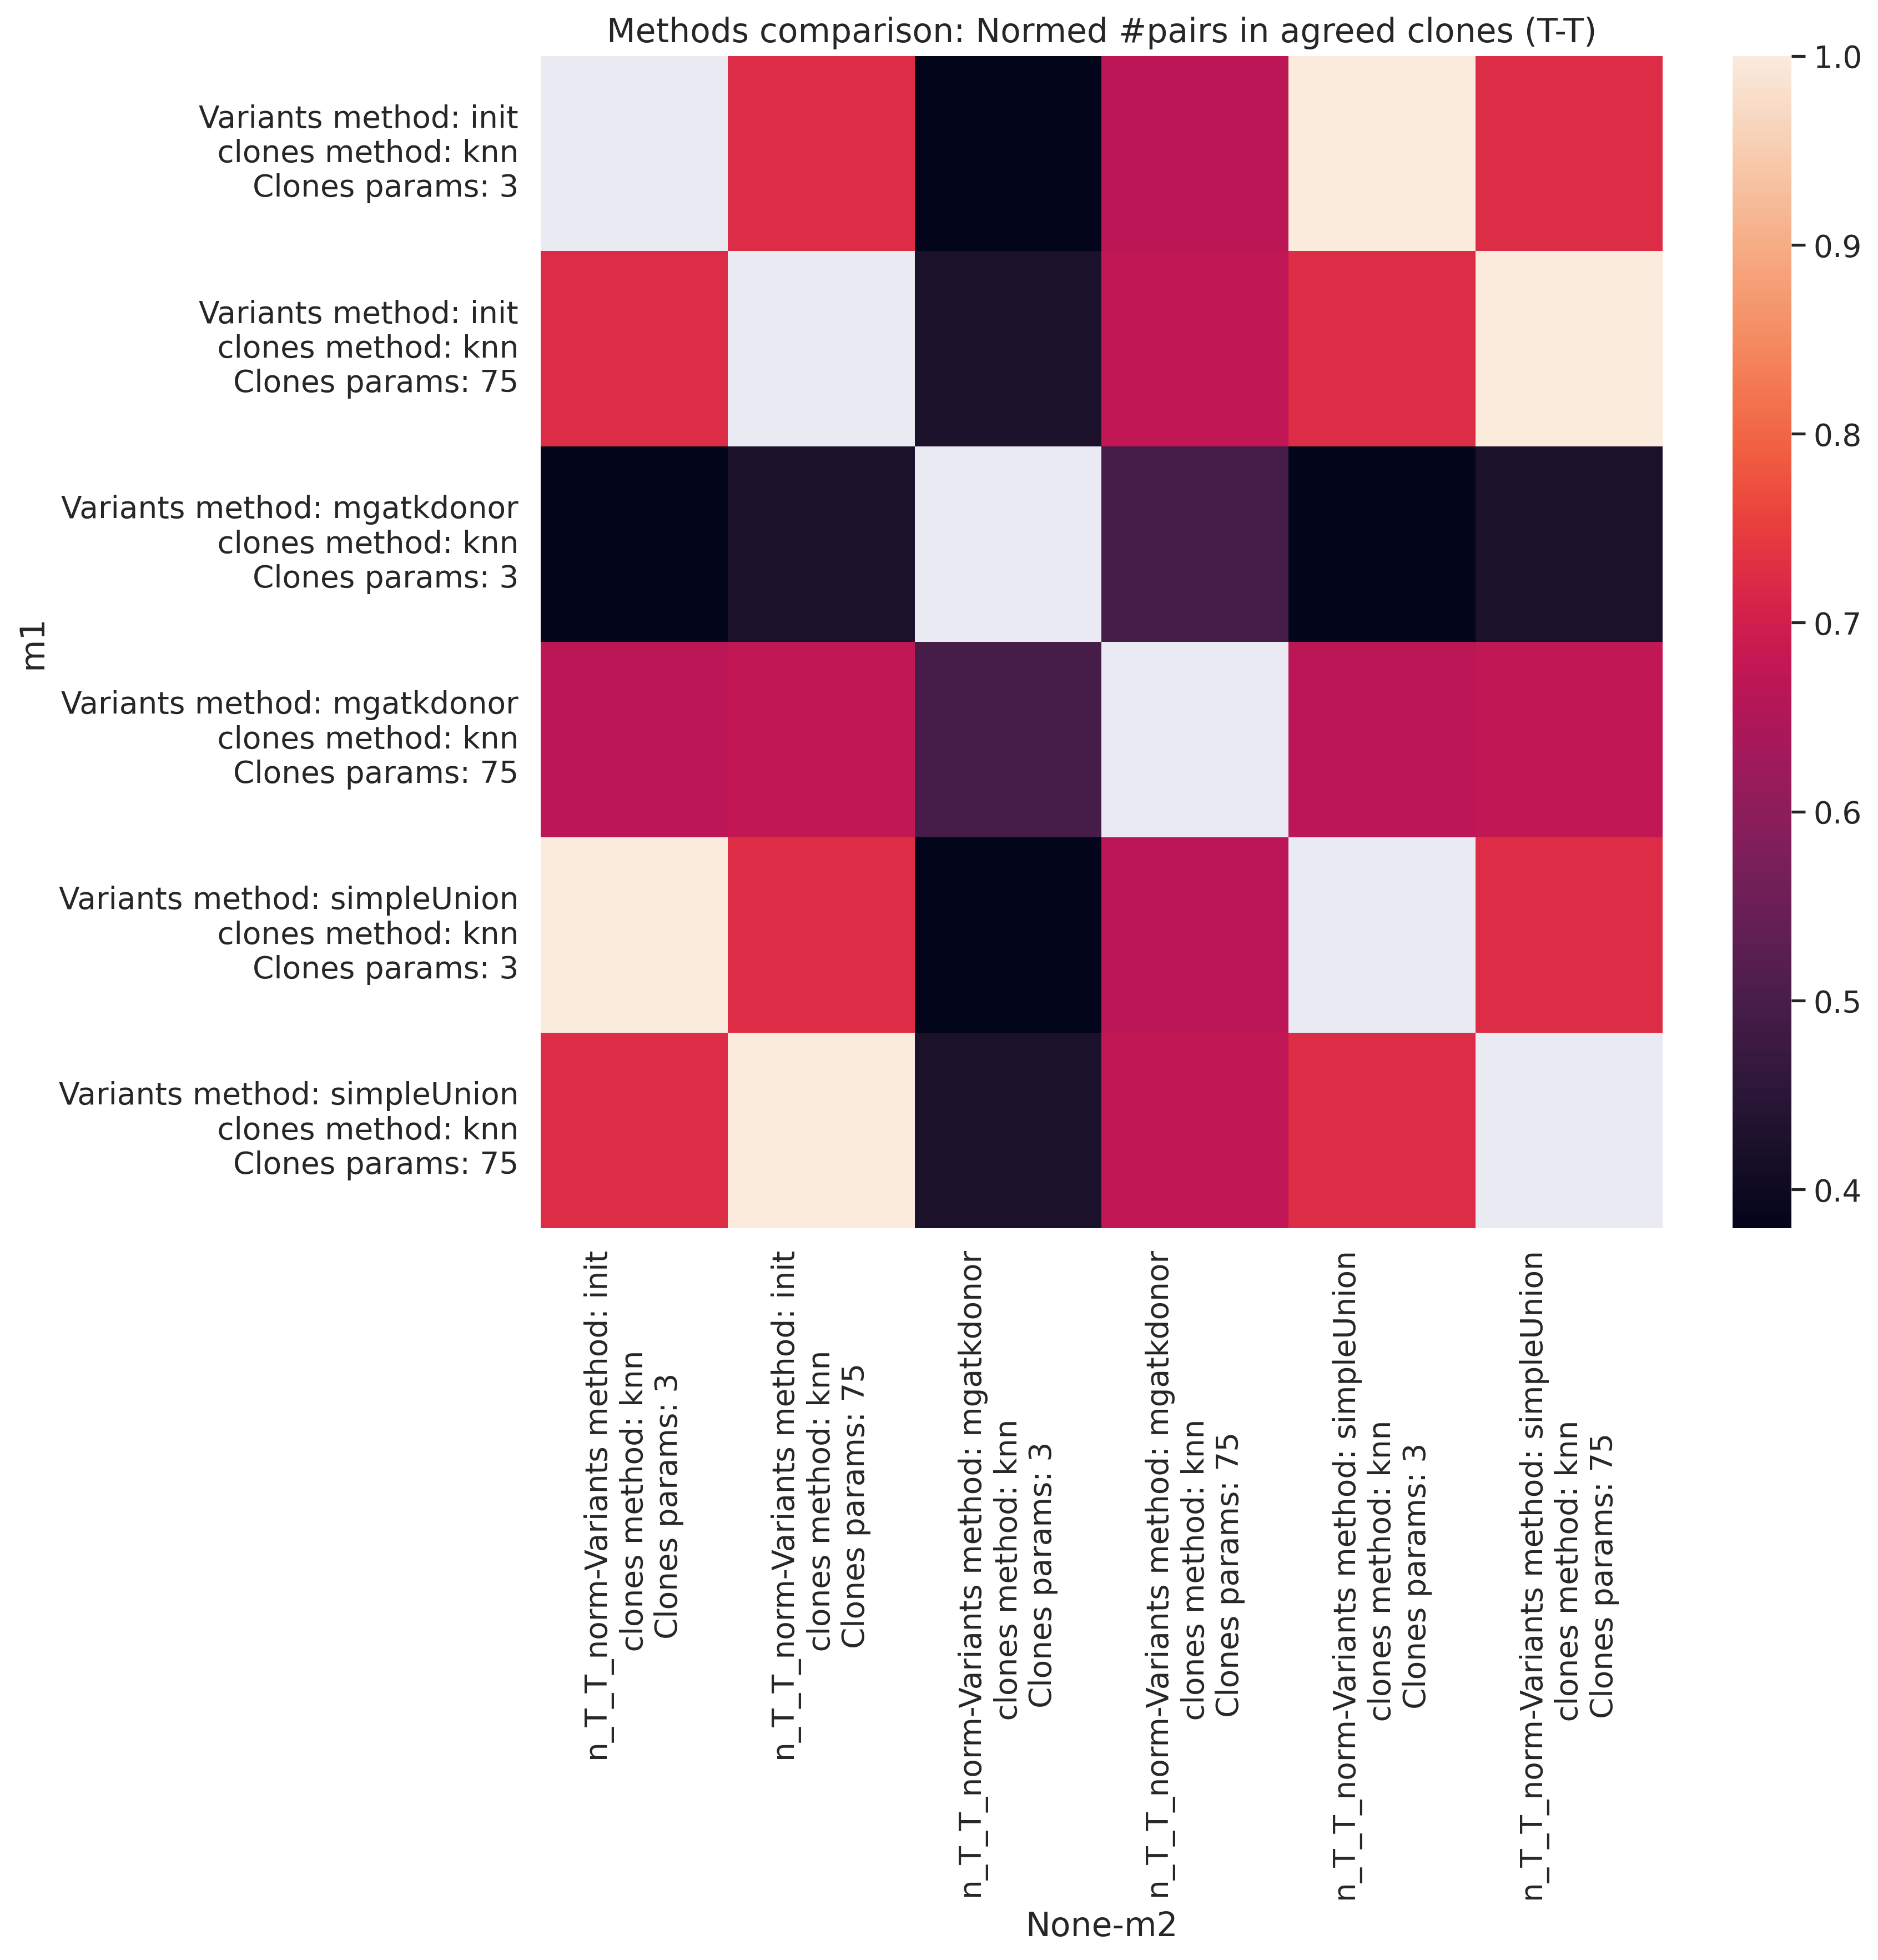

In [25]:
donors_agg_heatmap(meth_df, metric="n_agree", to_log=True,
               title="Methods comparison: #pairs with concordant clone assignment (T-T or F-F) \nlog10 counts")
plt.savefig(join(outdir, "methods_nAgree_agg.png"))

donors_agg_heatmap(meth_df, metric="n_agree_norm", title="Methods comparison: Normed #pairs in concordance (T-T or F-F)")
plt.savefig(join(outdir, "methods_nAgreeNorm_agg.png"))

donors_agg_heatmap(meth_df, metric="n_T_T", to_log=True,
               title="Methods comparison: #pairs in same clones across methods (T-T) \nlog10 counts")
plt.savefig(join(outdir, "methods_n_T_T_agg.png"))

donors_agg_heatmap(meth_df, metric="n_T_T_norm", title="Methods comparison: Normed #pairs in agreed clones (T-T)")
plt.savefig(join(outdir, "methods_nTTNorm_agg.png"))


